# ECG

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy import signal
import os
from operator import itemgetter

2672021-7143-MDC_ECG_ELEC_POTL_II-500.csv:


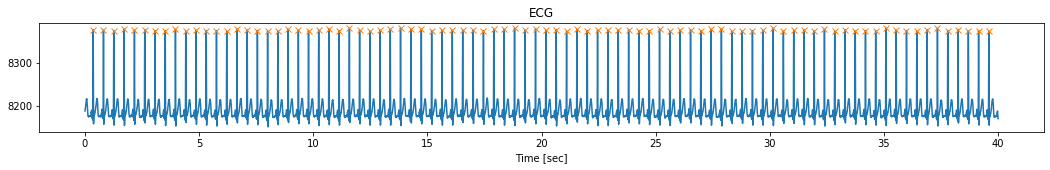

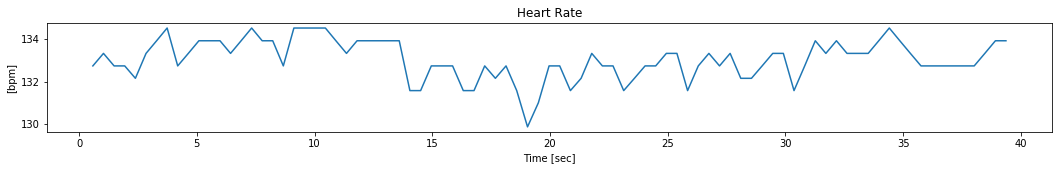

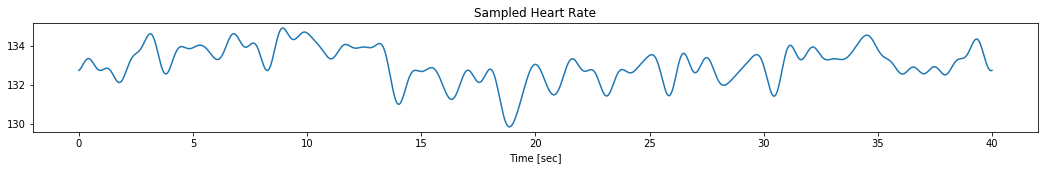

In [6]:
START_POINT=0
END_POINT=40
t = np.arange(START_POINT, END_POINT, 0.002)
F = 1000

ecg = []
hr_list =[]
for filename in os.listdir('samples'):
    if "MDC_ECG_ELEC_POTL_II-500" in filename:
        print(filename+':')
        with open('samples/'+ filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                ecg.append(float(row[1]))
            
            ecg_small = np.array(ecg[START_POINT*500:END_POINT*500])            
            peaks,_=find_peaks(ecg_small, height=8270, distance=155) #60/(220*0.002)
            peaks_sec = (peaks + START_POINT*500) * 0.002
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,ecg_small)
            plt.plot(peaks_sec, ecg_small[peaks], "x")
            plt.title('ECG')
            plt.xlabel('Time [sec]')
            plt.show()
            ecg = []
            
            diffs = np.diff(peaks_sec)
            peaks_sec = peaks_sec[:len(diffs)]+diffs/2
            hr = 60/diffs
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,hr)
            plt.title('Heart Rate')
            plt.xlabel('Time [sec]')
            plt.ylabel('[bpm]')
            plt.show()
            
            sampled_hr = signal.resample(hr, F*(END_POINT-START_POINT))
            sampled_t = np.arange(START_POINT, END_POINT, 1/F)
            
            plt.figure(figsize=(18, 2))
            plt.plot(sampled_t,sampled_hr)
            plt.title('Sampled Heart Rate')
            plt.xlabel('Time [sec]')
            plt.show()
            
            hr_list.append(sampled_hr)
